In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [19]:
df=pd.read_csv("Breast Cancer dataset.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [20]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [21]:
df.drop(['id','Unnamed: 32'], axis=1, inplace=True )

In [22]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [40]:
df.dtypes
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['diagnosis']=le.fit_transform(df['diagnosis'])

<Axes: title={'center': 'Breast Cancer Feature Correlation'}>

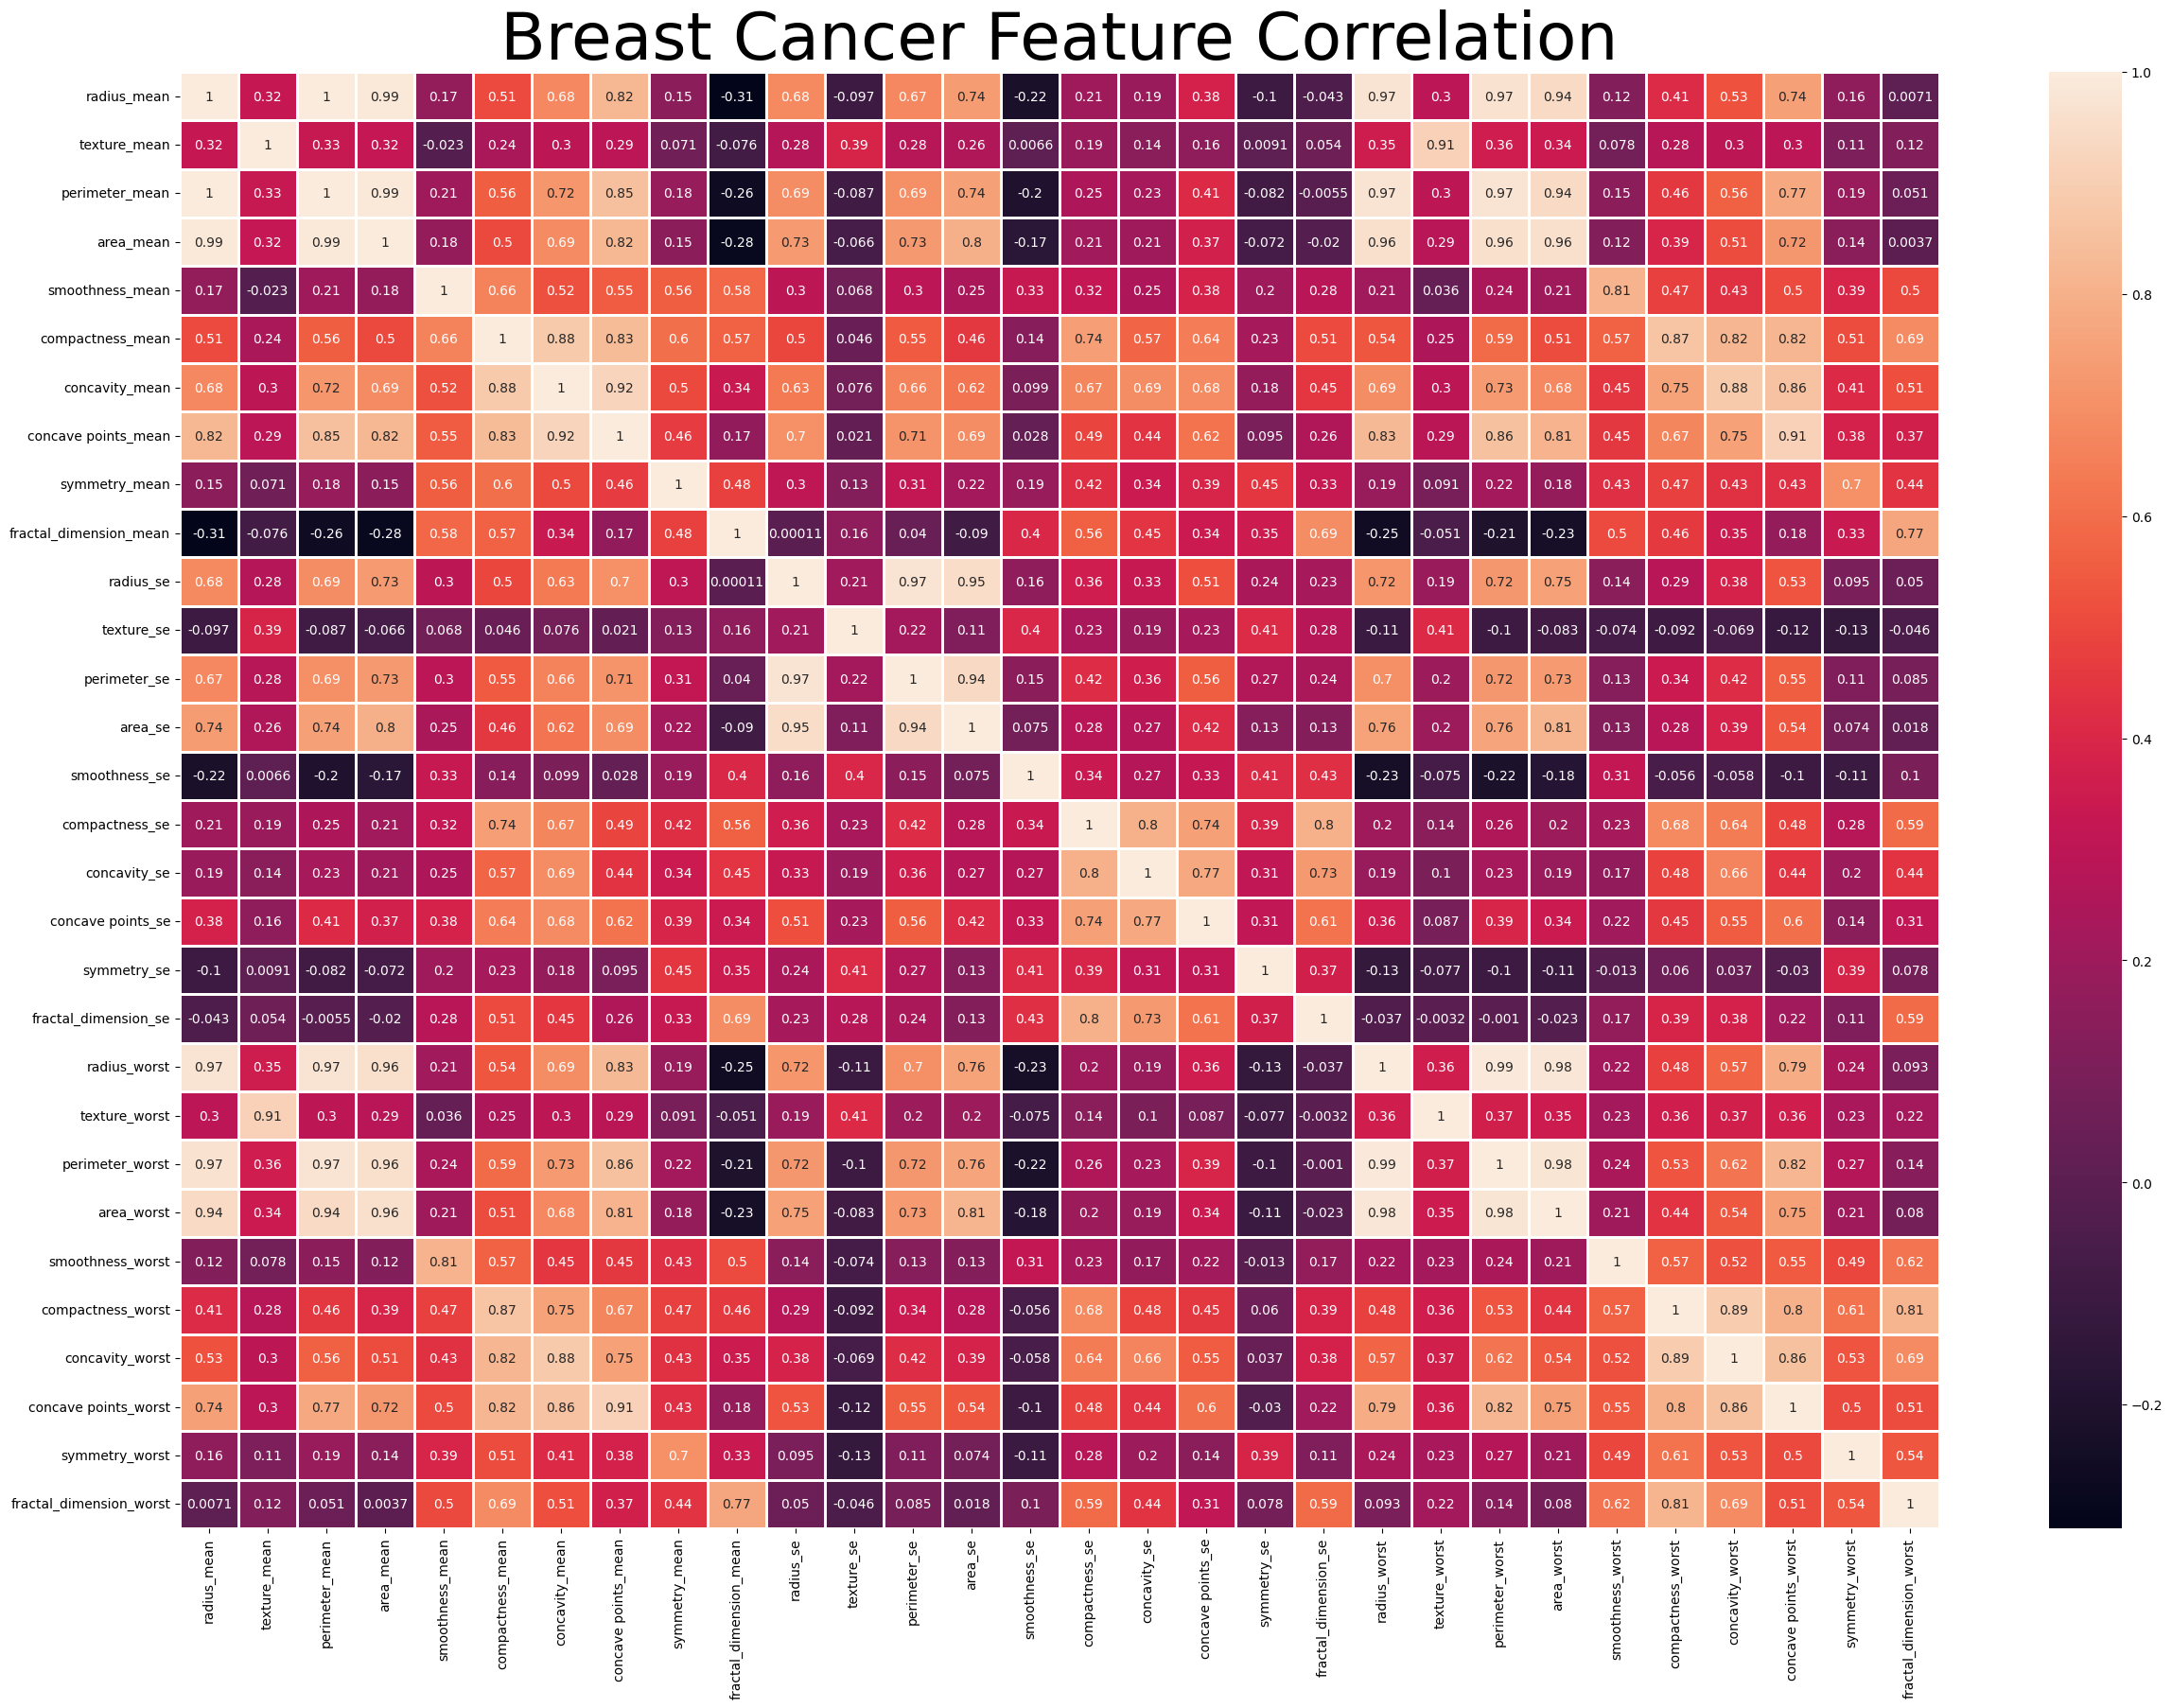

In [41]:
plt.figure(figsize=(30, 20))
plt.title('Breast Cancer Feature Correlation', fontsize=50)
sns.heatmap(data=(df.iloc[:, 1:]).corr(), annot=True, linewidths=1)

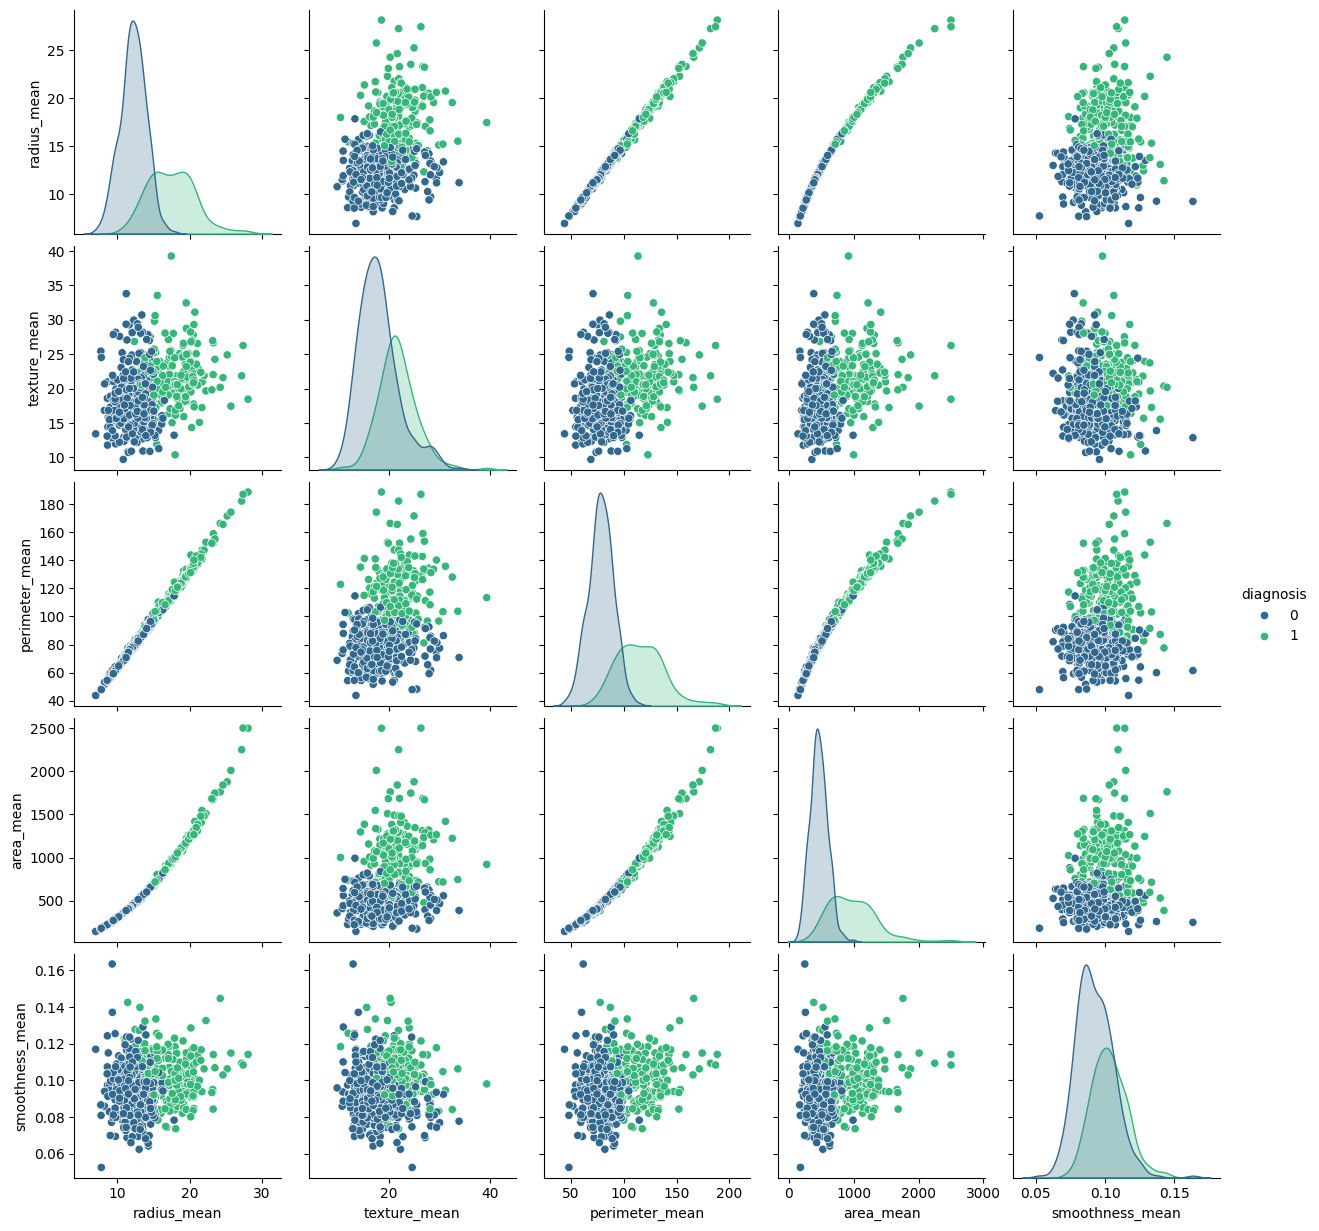

In [44]:
dfp = df[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean', 'diagnosis']]
sns.pairplot(data = dfp, hue = "diagnosis", palette = "viridis");

<Axes: xlabel='diagnosis', ylabel='count'>

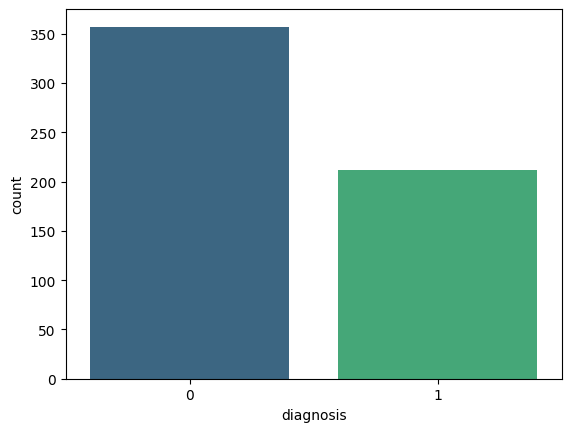

In [ ]:
sns.countplot(data=df, x=df['diagnosis'], palette='viridis' )

In [52]:
df.diagnosis.value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split
X=df.drop('diagnosis', axis=1)
y=df['diagnosis']

In [57]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [58]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

Model Training

In [59]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(X_train, y_train)
y_pred1=model1.predict(X_test)

Logistic Regression

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print('Accuracy Score of Logistic Regression: {:.2%}'.format(accuracy_score(y_test, y_pred1)))
print('The Confusion Matrix for Logistic Regression: \n', confusion_matrix(y_test, y_pred1))
print('The Classification Report for Logistic Regression: \n', classification_report(y_test, y_pred1))

Accuracy Score of Logistic Regression: 96.49%
The Confusion Matrix for Logistic Regression: 
 [[71  1]
 [ 3 39]]
The Classification Report for Logistic Regression: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(X_train, y_train)
y_pred2=model2.predict(X_test)
print('Accuracy Score of Decision Tree Classifier: {:.2%}'.format(accuracy_score(y_test, y_pred2)))
print('The Confusion Matrix for Decision Tree Classifier: \n', confusion_matrix(y_test, y_pred2))
print('The Classification Report for Decision Tree Classifier: \n', classification_report(y_test, y_pred2))

Accuracy Score of Decision Tree Classifier: 92.11%
The Confusion Matrix for Decision Tree Classifier: 
 [[68  4]
 [ 5 37]]
The Classification Report for Decision Tree Classifier: 
               precision    recall  f1-score   support

           0       0.93      0.94      0.94        72
           1       0.90      0.88      0.89        42

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier()
model3.fit(X_train, y_train)
y_pred3=model3.predict(X_test)
print('Accuracy Score of :Random Forest Classifier: {:.2%}'.format(accuracy_score(y_test, y_pred3)))
print('The Confusion Matrix for Random Forest Classifier: \n', confusion_matrix(y_test, y_pred3))
print('The Classification Report for Random Forest Classifier:\n', classification_report(y_test, y_pred3))

Accuracy Score of :Random Forest Classifier: 97.37%
The Confusion Matrix for Random Forest Classifier: 
 [[72  0]
 [ 3 39]]
The Classification Report for Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



Support Vector Machine

In [78]:
from sklearn.svm import SVC
model4=SVC()
model4.fit(X_train, y_train)
y_pred4=model4.predict(X_test)
print('Accuracy Score of Support Vector Classifier: {:.2%}'.format(accuracy_score(y_test, y_pred4)))
print('The Confusion Matrix for Support Vector Classifier: \n', confusion_matrix(y_test, y_pred4))
print('The Classification Report for Support Vector Classifier: \n', classification_report(y_test, y_pred4))

Accuracy Score of Support Vector Classifier: 97.37%
The Confusion Matrix for Support Vector Classifier: 
 [[72  0]
 [ 3 39]]
The Classification Report for Support Vector Classifier: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



KNN

In [79]:
from sklearn.neighbors import KNeighborsClassifier
model5=KNeighborsClassifier()
model5.fit(X_train, y_train)
y_pred5=model5.predict(X_test)
print('Accuracy Score of KNN Classifier: {:.2%}'.format(accuracy_score(y_test, y_pred5)))
print('The Confusion Matrix for KNN Classifier: \n', confusion_matrix(y_test, y_pred5))
print('The Classification Report for KNN Classifier: \n', classification_report(y_test, y_pred5))

Accuracy Score of KNN Classifier: 95.61%
The Confusion Matrix for KNN Classifier: 
 [[71  1]
 [ 4 38]]
The Classification Report for KNN Classifier: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Gaussian Naive Bayes

In [80]:
from sklearn.naive_bayes import GaussianNB
model6=GaussianNB()
model6.fit(X_train, y_train)
y_pred6=model6.predict(X_test)
print('Accuracy Score of Gaussian Naive Bayes Classifier: {:.2%}'.format(accuracy_score(y_test, y_pred1)))
print('The Confusion Matrix for Gaussian Naive Bayes Classifier: \n', confusion_matrix(y_test, y_pred1))
print('The Classification Report for Gausssian Naive Bayes Classifier: \n', classification_report(y_test, y_pred1))

Accuracy Score of Gaussian Naive Bayes Classifier: 96.49%
The Confusion Matrix for Gaussian Naive Bayes Classifier: 
 [[71  1]
 [ 3 39]]
The Classification Report for Gausssian Naive Bayes Classifier: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Best Accuracy: 97.37%

Model: Support Vector Machine
